MNIST

In [24]:
# 밑바닥부터 시작하는 딥러닝(p99)
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784',version=1)
import sys, os
sys.path.append(os.pardir) #부모 디렉토리 파일 가져올수있도록 설정
import numpy as np
import pickle
from mnist_dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [25]:
(train_image_data,train_label_data),(test_image_data,test_label_data) = load_mnist(flatten= True, normalize = False)

In [26]:
print(train_image_data.shape)
print(train_label_data.shape)
print(test_image_data.shape)
print(test_label_data.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [27]:
image = train_image_data[0]
image.shape

(784,)

In [28]:
image_reshaped = image.reshape(28,28)
image_reshaped.shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

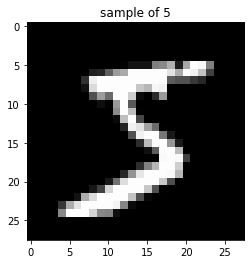

In [29]:
label = train_label_data[0]
plt.figure(figsize=(4,4))
plt.title("sample of "+str(label))
plt.imshow(image_reshaped,cmap="gray")
plt.show

신경망 구현

입력층 뉴런: 784(28x28) 출력층 뉴런 10개 w? 0-9까지 숫자구분 문제

In [38]:
def get_data():
    (image_train,label_train),(image_test,label_test) = load_mnist(flatten =True,normalize = True,one_hot_label=False)
    return image_test, label_test

In [39]:
def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

In [40]:
#시그모이드/ 렐루/소프트맥스 구현 함수 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    
    return y

In [43]:
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)
    
    return y

In [44]:
print(y) # 10개가 들어잇을 꺼고 여기서 제일 큰 수가 뭔지를 np.argmax 로 가져옴

[4.2882911e-04 2.0043037e-06 2.5405686e-03 2.0168918e-06 5.5917754e-04
 3.1262074e-04 9.9614763e-01 4.3499412e-07 6.3756934e-06 3.7751448e-07]


In [42]:
images, labels = get_data()
network = init_network()

accuracy_cnt =0
for i in range(len(images)):
    y = predict(network, images[i])
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻음
    if p==labels[i]:
        accuracy_cnt +=1

print("Accuracy:"+str(float(accuracy_cnt)/len(images)))

Accuracy:0.9352


In [45]:
images, labels = get_data()
network = init_network()

In [46]:
print("shpae of images =", images.shape)
print("shape of weight1 =", network["W1"].shape)
print("shape of weight2 =", network["W2"].shape)
print("shape of weight3 =", network["W3"].shape)

shpae of images = (10000, 784)
shape of weight1 = (784, 50)
shape of weight2 = (50, 100)
shape of weight3 = (100, 10)


신경망의 손글씨 숫자추론: 배치처리

배치란? 100개로 묶는것 계산을 image 하나씩 하는거나 차원을 늘려서 계산에 넣는것은 동일하다.

In [47]:
images, labels = get_data()
network = init_network()

In [48]:
#가중치 형상 출력
print("shpae of images =", images.shape)
print("shape of weight1 =", network["W1"].shape)
print("shape of weight2 =", network["W2"].shape)
print("shape of weight3 =", network["W3"].shape)

shpae of images = (10000, 784)
shape of weight1 = (784, 50)
shape of weight2 = (50, 100)
shape of weight3 = (100, 10)


In [50]:
batch_size =100
accuracy_cnt =0

for i in range(0,len(images),batch_size):
    x_batch = images[i:i+batch_size] #차원이 하나 더 늘어나 있다.
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==labels[i:i+batch_size])
    
print("Accuracy:"+str(float(accuracy_cnt)/len(images)))

Accuracy:0.9352


In [51]:
print(p) #열에서 가장 높은 값들이 나온 것

[8 9 0 1 2 9 4 5 6 7 8 0 1 2 3 4 7 8 9 7 8 6 4 1 9 2 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 0 6 3 5 9 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9
 4 3 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 5 6]
